## Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the file
df=pd.read_csv("churn_prediction.csv")

In [3]:
df.shape

(28382, 21)

In [4]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [6]:
#Deleting the duplicate values
df.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [7]:
df.drop_duplicates().shape

(28382, 21)

**There is no duplicate values**

## Imputing Missing Values

In [8]:
#Checking the missing values
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

**There are five missing values.**

In [9]:
#Checking the missing values
df[['gender','dependents','occupation','city','days_since_last_transaction']].head()

,gender,dependents,occupation,city,days_since_last_transaction
0,Male,0.0,self_employed,187.0,224.0
1,Male,0.0,self_employed,NaN,60.0
2,Male,0.0,salaried,146.0,NaN
3,NaN,NaN,self_employed,1020.0,147.0
4,Male,2.0,self_employed,1494.0,58.0


**1. Missing Values in gender**

In [10]:
#checking mode
df['gender'].mode()

0    Male
dtype: object

In [11]:
#imputing missing with mode
df['gender'].fillna(value=(df['gender'].mode()[0]), inplace=True)

**2. Missing Values in dependents**

In [12]:
#checking mode
df['dependents'].mode()

0    0.0
dtype: float64

In [13]:
#imputing missing with mode
df['dependents'].fillna(value=(df['dependents'].mode()[0]), inplace=True)

**3. Missing Values in occupation**

In [14]:
#checking mode
df['occupation'].mode()

0    self_employed
dtype: object

In [15]:
#imputing missing with mode
df['occupation'].fillna(value=(df['occupation'].mode()[0]), inplace=True)

**4. Missing Values in city**

In [16]:
#checking mode
df['city'].mode()

0    1020.0
dtype: float64

In [17]:
#imputing missing with mode
df['city'].fillna(value=(df['city'].mode()[0]), inplace=True)

**5. Missing Values in days_since_last_transaction**

In [18]:
#checking mean
a=df['days_since_last_transaction'].mean()
round(a)

70

In [19]:
#imputing missing with mean
df['days_since_last_transaction'].fillna(value=round(a), inplace=True)

**We are substituting days_since_last_transaction with mean as it is number of days.**

In [20]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [21]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [22]:
#Changing the datatype
df=df.astype({'dependents':'int64','city':'int64'})

In [23]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                          int64
occupation                         object
city                                int64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [24]:
#Looking at different categorical columns
categorical_cols = ['gender','dependents','occupation','customer_nw_category','city','branch_code','churn']

for i in categorical_cols:
    print('***** Value Count in', i, '*****')
    print(df[i].value_counts())
    print('')

***** Value Count in gender *****
Male      17073
Female    11309
Name: gender, dtype: int64

***** Value Count in dependents *****
0     23898
2      2150
1      1395
3       701
4       179
5        41
6         8
7         3
25        1
9         1
8         1
52        1
36        1
50        1
32        1
Name: dependents, dtype: int64

***** Value Count in occupation *****
self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

***** Value Count in customer_nw_category *****
2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

***** Value Count in city *****
1020    4282
1096    2016
409     1334
146     1291
834     1138
        ... 
638        1
1060       1
1596       1
1028       1
1211       1
Name: city, Length: 1604, dtype: int64

***** Value Count in branch_code *****
19      145
6       142
60      128
16      111
8       109
       ... 
3386      1
3418      

In [25]:
#gender assignment
gender_assign = {"gender":     {"Male": 0, "Female": 1}}
df.replace(gender_assign, inplace=True)

In [26]:
#occupation assignment
occu_assign = {"occupation":     {"self_employed": 0, "salaried": 1, "student": 2, "retired":3 ,"company":4 }}
df.replace(occu_assign, inplace=True)

In [27]:
df.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0,0,187,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,0,0,0,1020,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,0,0,1,146,2,41,70.0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,0,0,0,1020,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,0,2,0,1494,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,1,0,0,1096,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,0,0,3,1020,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,0,0,0,623,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,0,0,1,1096,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,0,3,0,1020,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [28]:
df.shape

(28382, 21)

In [29]:
#Changing the datatypes
df=df.astype({'gender':'int64','occupation':'int64'})

In [30]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                              int64
dependents                          int64
occupation                          int64
city                                int64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

## Splitting

**Separating Dependent and Independent variables**

In [31]:
#For Train Set
data_x=df.drop(['churn'],axis=1)
data_y=df['churn']

**Creating Validation and Test Set**

In [32]:
from sklearn.model_selection import train_test_split as tts
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size = 0.2 , random_state = 50, stratify = data_y)

In [33]:
train_x, val_x, train_y, val_y = tts(train1_x, train1_y, test_size = 0.2 , random_state = 51, stratify = train1_y)

print('Training Data    ',train_x.shape,train_y.shape)
print('Validation Data  ',val_x.shape,val_y.shape)
print('Test Data        ',test_x.shape,test_y.shape)

Training Data     (18164, 20) (18164,)
Validation Data   (4541, 20) (4541,)
Test Data         (5677, 20) (5677,)


In [34]:
train_y.value_counts()/len(train_y)

0    0.814688
1    0.185312
Name: churn, dtype: float64

In [35]:
val_y.value_counts()/len(val_y)

0    0.814578
1    0.185422
Name: churn, dtype: float64

In [36]:
test_y.value_counts()/len(test_y)

0    0.814691
1    0.185309
Name: churn, dtype: float64

## Univariate Analysis

## Histogram

Text(0.5, 0, 'churn')

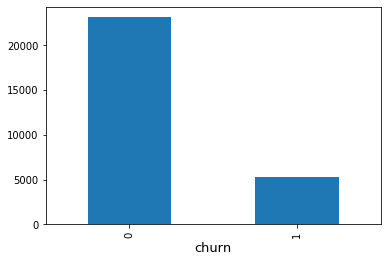

In [37]:
# Target variable
df['churn'].value_counts().plot(kind='bar')
plt.xlabel('churn',fontsize=13)

In [38]:
#Percentage of target variable
df['churn'].value_counts()/len(df['churn'])*100

0    81.467127
1    18.532873
Name: churn, dtype: float64

Text(0.5, 0, 'churn')

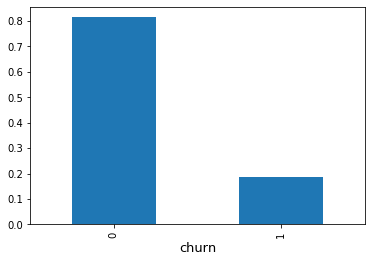

In [39]:
(df['churn'].value_counts()/len(df['churn'])).plot(kind='bar')
plt.xlabel('churn',fontsize=13)

In [40]:
# Percentage of male and female
train_x['gender'].value_counts()/len(train_x['gender'])*100

0    60.080379
1    39.919621
Name: gender, dtype: float64

Text(0.5, 0, 'gender')

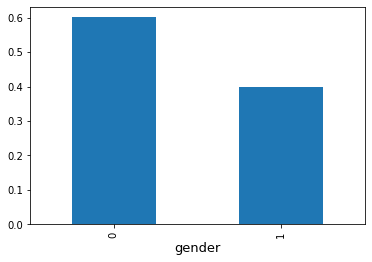

In [41]:
(train_x['gender'].value_counts()/len(train_x['gender'])).plot.bar()
plt.xlabel('gender',fontsize=13)

Text(0.5, 0, 'dependents')

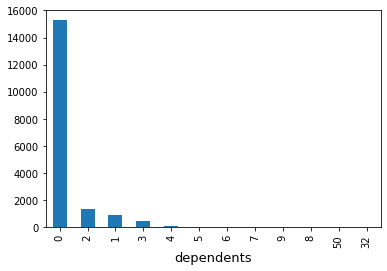

In [42]:
train_x['dependents'].value_counts().plot(kind='bar')
plt.xlabel('dependents',fontsize=13)

In [43]:
train_x['dependents'].value_counts()

0     15288
2      1374
1       908
3       443
4       111
5        28
6         6
7         2
9         1
8         1
50        1
32        1
Name: dependents, dtype: int64

In [44]:
train_x['dependents'].mode()

0    0
dtype: int64

In [45]:
train_x['dependents'].replace({50:0, 32:0}, inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [46]:
train_x['dependents'].value_counts()

0    15290
2     1374
1      908
3      443
4      111
5       28
6        6
7        2
9        1
8        1
Name: dependents, dtype: int64

Text(0.5, 0, 'dependents')

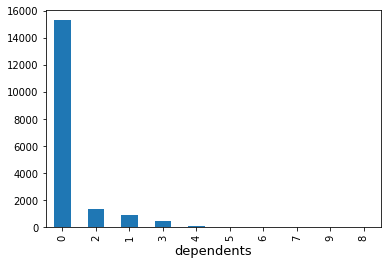

In [47]:
train_x['dependents'].value_counts().plot(kind='bar')
plt.xlabel('dependents',fontsize=13)

Text(0.5, 0, 'dependents')

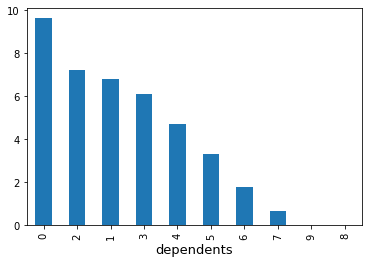

In [48]:
np.log(train_x['dependents'].value_counts()).plot.bar()
plt.xlabel('dependents',fontsize=13)

Text(0.5, 0, 'dependents')

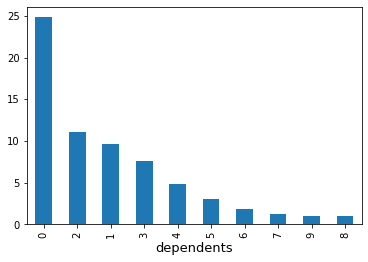

In [49]:
np.power(train_x['dependents'].value_counts(),1/3).plot.bar()
plt.xlabel('dependents',fontsize=13)

Text(0.5, 0, 'occupation')

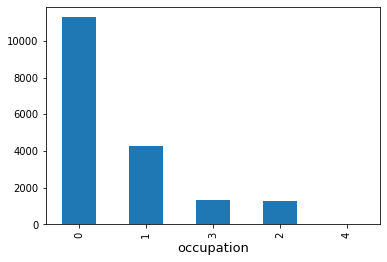

In [50]:
train_x['occupation'].value_counts().plot(kind='bar')
plt.xlabel('occupation',fontsize=13)

Text(0.5, 0, 'customer net worth')

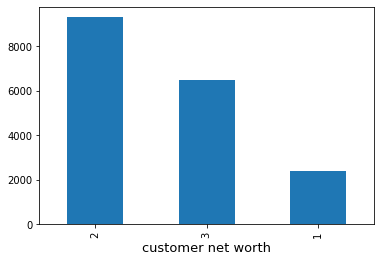

In [51]:
train_x['customer_nw_category'].value_counts().plot(kind='bar')
plt.xlabel('customer net worth',fontsize=13)

## Boxplot

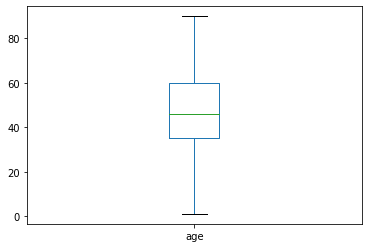

In [52]:
train_x['age'].plot.box()

## Bivariate Analysis

## Scatter Plot

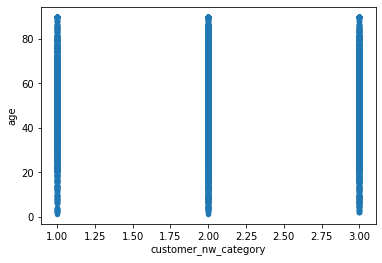

In [53]:
train_x.plot.scatter('customer_nw_category','age')

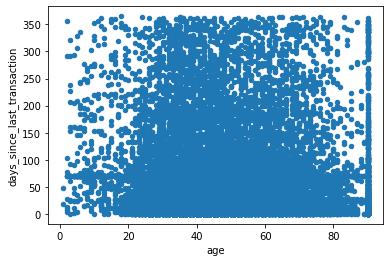

In [54]:
train_x.plot.scatter('age','days_since_last_transaction')

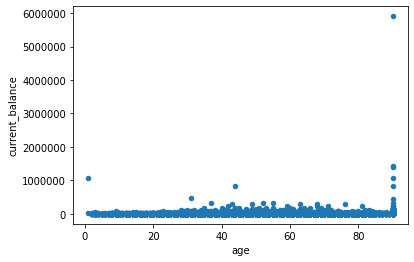

In [55]:
train_x.plot.scatter('age','current_balance')

## Removing Outlier from current_balance

In [56]:
train_x[train_x['current_balance']>=2000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
9908,10575,1670,90,0,0,0,243,2,2542,18.0,5905904.03,5740438.63,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5


In [57]:
train_x=train_x[train_x['current_balance']<=2000000]

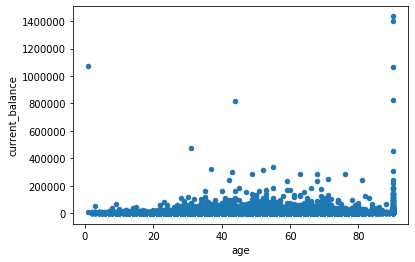

In [58]:
train_x.plot.scatter('age','current_balance')

In [59]:
train_x[train_x['current_balance']>=400000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
12457,13305,2156,90,0,0,0,1467,2,191,54.0,453172.56,453172.56,436114.35,387695.06,0.11,44067.14,0.11,0.11,453172.56,446064.97
28249,30160,4395,44,0,0,1,1096,1,578,18.0,815323.98,957743.74,904711.72,89623.09,30537.39,143777.37,172857.49,138677.57,880628.04,898246.69
23211,24764,2560,90,0,0,0,751,2,138,108.0,1064423.50,1396836.81,1608344.15,757872.97,0.56,0.56,240137.37,95975.76,1284357.61,1572832.93
19977,21317,842,1,0,0,0,105,2,650,18.0,1076091.29,1001123.73,618417.06,581507.67,216396.14,143980.87,141428.59,571428.59,1074624.64,663884.48
23247,24807,1732,90,0,0,0,1294,2,150,70.0,1398486.42,1398486.42,1398486.42,1389626.93,0.31,0.31,0.31,0.31,1398486.42,1398486.42
15841,16902,446,31,0,0,0,1020,1,16,62.0,472487.44,222490.55,264798.71,96598.87,0.54,0.54,3.73,120399.39,499582.32,263874.67
10955,11709,521,90,0,0,0,1341,2,2688,11.0,828201.44,828191.67,595422.52,381539.20,9.84,441798.76,0.07,0.07,828195.71,571669.08
27856,29735,194,90,0,0,0,904,1,296,213.0,1435872.80,1435872.80,1435872.80,413107.52,0.24,0.24,0.24,0.24,1435872.80,1435872.80


In [60]:
train_x=train_x[train_x['current_balance']<=400000]

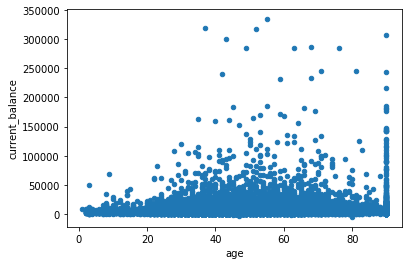

In [61]:
train_x.plot.scatter('age','current_balance')

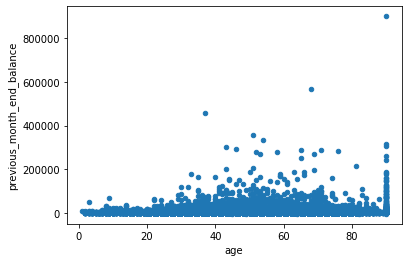

In [62]:
train_x.plot.scatter('age','previous_month_end_balance')

## Removing Outlier from previous_month_end_balance

In [63]:
train_x[train_x['previous_month_end_balance']>=300000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
17560,18737,1570,90,0,0,0,1322,2,176,12.0,29522.16,898976.76,758715.17,856596.51,320309.94,0.50,0.50,0.50,478192.00,898976.76
3711,3957,285,54,0,2,1,905,2,1421,13.0,31833.45,332504.88,319030.57,11525.29,17143.47,287032.23,317814.90,296429.19,315194.04,363272.49
27051,28884,3344,37,0,4,0,1020,1,15,102.0,319408.70,455803.54,418903.58,456361.44,0.17,0.17,136703.06,206.91,344101.86,455874.66
701,749,1153,90,0,0,0,1020,2,2255,35.0,307672.70,308291.63,307417.18,310121.23,0.61,172.39,0.61,179.51,308078.13,306390.07
5448,5800,1005,43,1,0,1,1096,1,1985,9.0,300621.32,300428.71,307288.13,227799.85,6841.80,2.16,6932.10,12923.86,303613.56,309652.99
12218,13047,3882,51,0,0,0,1020,1,60,7.0,18467.12,356602.22,170440.29,113738.06,1383300.84,1971436.45,242838.61,8394.94,131732.17,300160.62
8023,8550,196,90,0,0,0,623,1,42,4.0,179832.37,314682.02,92596.95,481.78,915151.36,0.20,1335714.49,100000.20,124326.08,153068.88
12132,12952,447,68,1,0,3,1020,1,80,27.0,232895.43,565069.06,206930.92,12836.59,27929.01,555100.44,288674.07,0.44,311693.80,299129.89


In [64]:
train_x=train_x[train_x['current_balance']<=300000]

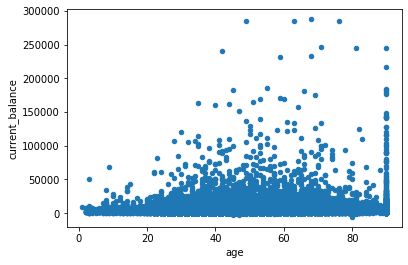

In [65]:
train_x.plot.scatter('age','current_balance')

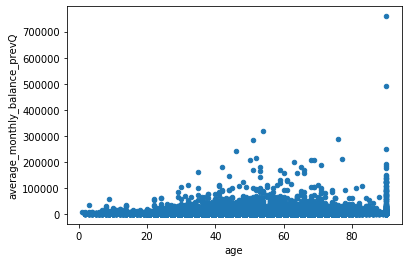

In [66]:
train_x.plot.scatter('age','average_monthly_balance_prevQ')

## Removing Outlier from average_monthly_balance_prevQ

In [67]:
train_x[train_x['average_monthly_balance_prevQ']>=240000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
17560,18737,1570,90,0,0,0,1322,2,176,12.0,29522.16,898976.76,758715.17,856596.51,320309.94,0.50,0.50,0.50,478192.00,898976.76
6120,6518,1103,90,0,0,0,409,2,588,11.0,99510.66,243626.01,490044.03,335042.86,995241.38,216939.28,1110922.50,1012877.80,392962.66,618549.76
3711,3957,285,54,0,2,1,905,2,1421,13.0,31833.45,332504.88,319030.57,11525.29,17143.47,287032.23,317814.90,296429.19,315194.04,363272.49
2428,2596,1379,76,1,0,0,409,1,336,27.0,285560.79,283180.88,287430.99,98006.64,1786.23,1725.27,26.99,7261.23,285443.95,289522.70
21502,22935,938,90,0,0,0,229,1,2297,35.0,244297.20,259163.97,252037.31,272571.69,0.06,35714.34,14866.83,23098.93,248791.16,242809.19
9264,9882,5203,46,0,0,0,169,1,1711,91.0,63991.11,292848.26,242295.55,148959.54,0.33,0.33,300286.04,0.33,130434.46,292848.26
7787,8295,2895,51,0,0,0,1232,1,7,4.0,164802.00,206014.78,284779.02,323182.68,1476976.45,2361808.29,824573.99,1159958.76,263497.14,383897.54


In [68]:
train_x=train_x[train_x['average_monthly_balance_prevQ']<=240000]

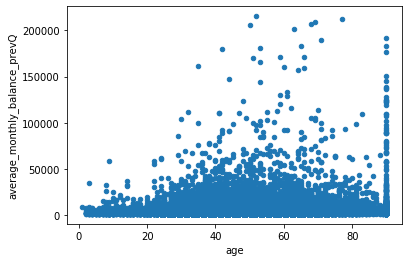

In [69]:
train_x.plot.scatter('age','average_monthly_balance_prevQ')

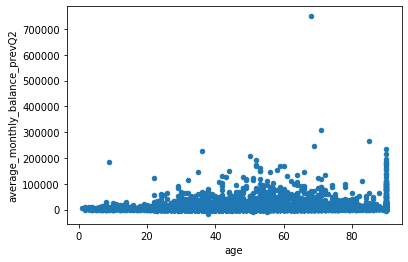

In [70]:
train_x.plot.scatter('age','average_monthly_balance_prevQ2')

## Removing Outlier from average_monthly_balance_prevQ2

In [71]:
train_x[train_x['average_monthly_balance_prevQ2']>=400000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
21214,22629,5250,68,0,1,1,409,2,46,4.0,684.59,1156.09,71188.74,749638.99,16314.36,6500.07,16785.86,6443.0,684.59,1509.32


In [72]:
train_x=train_x[train_x['average_monthly_balance_prevQ2']<=400000]

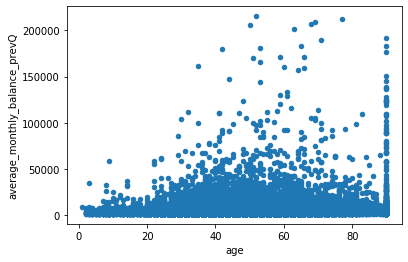

In [73]:
train_x.plot.scatter('age','average_monthly_balance_prevQ')

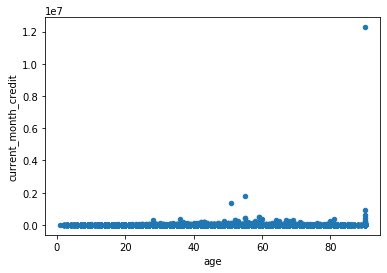

In [74]:
train_x.plot.scatter('age','current_month_credit')

## Removing Outlier from current_month_credit

In [75]:
train_x[train_x['current_month_credit']>=400000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
2078,2223,2260,90,0,0,0,224,1,1687,0.0,53622.86,69194.28,57750.62,105927.68,634428.70,566428.70,650000.13,557142.99,50278.03,69148.20
5833,6214,3024,55,0,0,0,409,2,144,0.0,185778.65,664.42,72796.89,5694.29,447036.10,3822.09,262286.37,8369.91,211231.15,2540.11
9049,9654,4098,55,0,2,0,1020,2,419,4.0,0.65,92857.80,12479.89,17050.53,420011.93,467683.27,535854.00,531227.99,4220.03,16283.66
12826,13697,6809,59,0,0,1,1020,1,240,0.0,231195.30,30468.91,36449.78,38978.66,468086.23,26328.58,73819.76,96212.01,29462.87,63384.74
24095,25712,1192,90,0,0,3,1020,2,5,18.0,46.50,24270.54,11728.39,111617.41,12269845.39,0.21,7637857.36,0.21,8399.62,24270.54
9493,10131,2867,59,0,2,0,1020,1,410,0.0,28600.51,34005.37,12074.81,7655.22,486187.64,1447086.21,457836.21,1363197.64,13812.27,20309.54
12218,13047,3882,51,0,0,0,1020,1,60,7.0,18467.12,356602.22,170440.29,113738.06,1383300.84,1971436.45,242838.61,8394.94,131732.17,300160.62
3469,3693,2665,90,0,0,0,1020,2,84,14.0,32908.30,17863.44,72374.05,48859.71,444316.81,221760.10,429271.95,352566.20,78689.15,65385.07
8023,8550,196,90,0,0,0,623,1,42,4.0,179832.37,314682.02,92596.95,481.78,915151.36,0.20,1335714.49,100000.20,124326.08,153068.88
13012,13895,2903,55,1,0,0,1534,2,63,11.0,23415.56,22919.79,22416.17,22092.02,1764285.97,71428.83,1764285.97,71428.83,23278.80,22617.63


In [76]:
train_x=train_x[train_x['current_month_credit']<=400000]

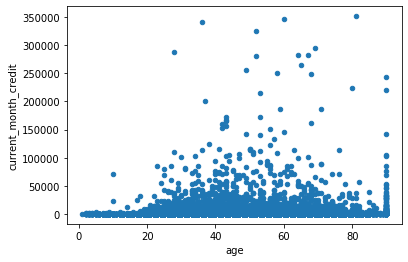

In [77]:
train_x.plot.scatter('age','current_month_credit')

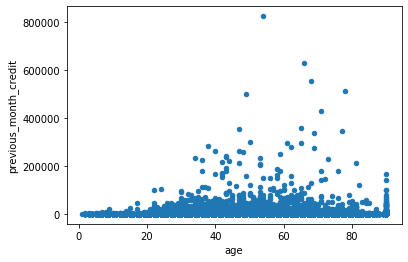

In [78]:
train_x.plot.scatter('age','previous_month_credit')

## Removing Outlier from previous_month_credit

In [79]:
train_x[train_x['previous_month_credit']>=300000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
7637,8134,3506,54,0,1,0,1020,2,60,26.0,202.51,276.10,1686.08,2582.02,786.03,825646.74,2135.65,775453.50,756.62,1387.05
21826,23281,3678,69,1,1,3,146,1,286,12.0,85403.63,95795.26,105174.63,72796.66,36219.12,339029.81,135919.77,160014.24,89512.06,115664.24
26602,28405,4002,47,0,0,0,834,1,14,12.0,5846.27,679.84,3667.28,50473.71,13712.29,355714.71,28545.86,13261.30,4536.84,1778.18
25256,26961,792,49,1,0,0,1020,1,16,54.0,22166.97,27063.75,30850.91,16657.72,0.26,500214.54,4897.04,771278.83,22842.38,39297.90
15220,16238,2497,66,0,2,0,334,2,1364,42.0,13036.16,23390.02,71787.88,16761.09,0.46,630389.61,10211.46,72710.22,17620.67,34236.20
21042,22451,2419,65,1,1,0,1020,1,5,17.0,111546.66,253478.87,183067.16,4154.40,49428.94,359000.37,198523.14,279987.47,136280.90,374790.09
12132,12952,447,68,1,0,3,1020,1,80,27.0,232895.43,565069.06,206930.92,12836.59,27929.01,555100.44,288674.07,0.44,311693.80,299129.89
16200,17287,5533,78,1,0,0,1020,1,47,7.0,4129.77,5834.90,25569.39,18758.63,1106.06,512924.02,2357.17,557242.89,5362.95,20473.77
24826,26494,2293,71,0,0,3,1020,2,239,12.0,33157.60,33188.03,57784.52,119764.64,36590.94,429852.25,945.16,395308.61,39267.67,65131.29
9915,10582,775,77,0,0,3,1126,2,2377,42.0,16605.47,16605.47,211955.47,27790.29,0.47,345357.61,0.47,457143.33,16605.47,138195.41


In [80]:
train_x=train_x[train_x['previous_month_credit']<=300000]

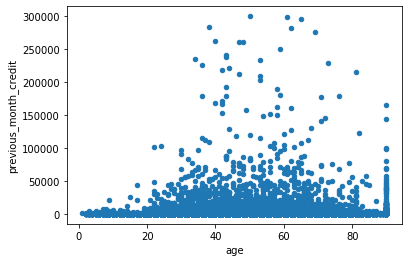

In [81]:
train_x.plot.scatter('age','previous_month_credit')

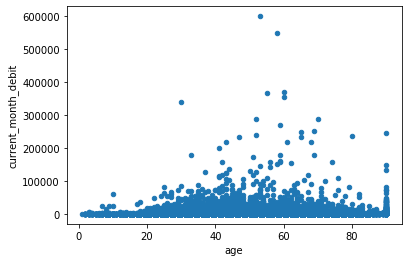

In [82]:
train_x.plot.scatter('age','current_month_debit')

## Removing Outlier from current_month_debit

In [83]:
train_x[train_x['current_month_debit']>=300000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
17626,18803,5094,30,1,0,0,485,2,1296,6.0,1372.13,1628.80,1815.49,3519.10,102009.06,0.49,340219.77,471.91,1590.49,1634.67
7228,7697,4188,60,0,0,0,1046,2,102,7.0,17594.09,18226.30,44231.52,78156.02,346970.73,0.06,354748.44,15279.31,51188.02,18522.68
19504,20818,3875,58,0,0,0,1046,1,1248,4.0,703.78,280938.79,39536.66,7698.79,250157.27,3637.61,548857.97,3043.76,94983.09,19955.31
19109,20399,1489,60,0,0,0,1020,1,80,13.0,48990.75,38242.78,67878.71,5669.51,15633.91,0.63,369640.97,17315.39,67331.38,75708.63
2681,2857,2958,55,0,0,0,1020,1,60,185.0,2140.78,2547.31,2173.35,3899.13,0.66,0.66,367549.22,403332.38,2487.28,2132.24
14223,15184,5879,53,0,0,0,1020,1,240,14.0,1866.89,7568.95,45607.15,36620.92,10837.51,8587.09,598777.72,35630.54,86949.28,15028.90


In [84]:
train_x=train_x[train_x['current_month_debit']<=300000]

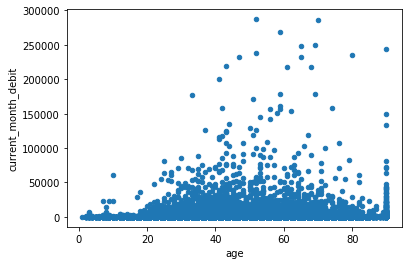

In [85]:
train_x.plot.scatter('age','current_month_debit')

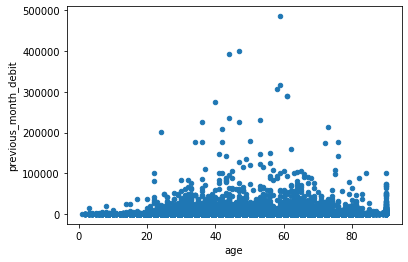

In [86]:
train_x.plot.scatter('age','previous_month_debit')

## Removing Outlier from previous_month_debit

In [87]:
train_x[train_x['previous_month_debit']>=250000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
8273,8813,2258,61,0,1,0,623,1,21,21.0,1660.79,1187.94,37239.62,15942.66,16138.67,297894.79,15660.39,289961.81,2745.50,59473.61
18310,19536,4493,59,0,4,0,567,2,255,7.0,15116.86,8286.18,38477.49,12707.51,34703.20,249825.16,268216.99,485773.84,20915.01,53922.50
6990,7447,4305,59,0,1,1,334,1,166,0.0,48602.29,12884.86,21763.64,12255.99,187007.88,179847.25,178988.19,317399.24,18702.79,17583.64
14707,15698,2656,47,0,1,1,1096,1,586,7.0,11.86,237.72,32313.88,4175.83,2144.62,2858.94,309.16,400329.51,90.58,79060.60
23880,25484,1690,40,1,0,0,1096,1,1719,24.0,310.31,1231.32,2926.89,1380.22,1006.10,262434.67,3054.97,274709.11,1259.70,4789.18
19287,20590,6194,58,1,2,0,1020,2,85,5.0,29986.88,21918.66,14668.24,6843.59,17143.41,161860.51,8753.93,307897.60,21298.51,16543.87
16231,17320,1810,44,1,0,0,1020,1,239,27.0,3133.58,71.75,18279.68,174.81,28640.44,0.31,25578.61,393386.54,3027.99,50988.96
19003,20286,4289,61,0,2,0,1020,2,285,21.0,2300.98,87.81,20442.57,9226.25,67486.37,67857.80,217143.51,288859.77,19235.94,7710.58


In [88]:
train_x=train_x[train_x['previous_month_debit']<=250000]

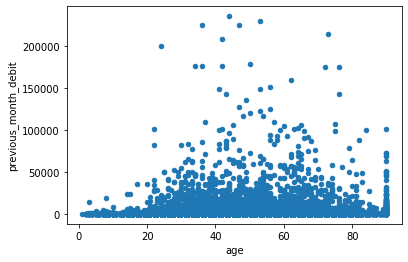

In [89]:
train_x.plot.scatter('age','previous_month_debit')

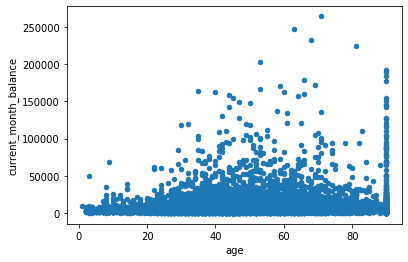

In [90]:
train_x.plot.scatter('age','current_month_balance')

## Removing Outlier from current_month_balance

In [91]:
train_x[train_x['current_month_balance']>=175000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
28030,29924,412,90,0,0,0,623,2,218,70.0,177074.17,177074.17,177074.17,174972.39,0.04,0.04,0.04,0.04,177074.17,177074.17
17017,18159,2020,68,0,0,3,623,1,2019,0.0,287502.60,81863.17,104738.43,73237.55,248426.43,62326.43,714.73,0.44,233300.48,30791.14
17043,18187,1263,90,0,0,0,751,2,138,157.0,182407.29,186478.71,191767.91,216113.49,0.16,0.16,4071.59,0.16,189580.66,185953.37
23434,25003,1718,71,1,0,1,1096,1,572,0.0,246034.65,286515.81,189244.25,308575.26,1543.02,177508.32,42183.97,28187.26,264770.42,212294.44
23852,25450,1755,53,0,0,1,146,1,1756,3.0,140338.73,268937.07,180653.26,56732.95,17109.24,0.67,145686.39,1227.46,202633.86,253013.92
13355,14258,450,63,0,0,1,146,1,1755,80.0,284468.68,187080.29,201313.54,99219.04,0.49,0.49,0.49,5817.46,247528.26,197251.66
1704,1830,749,90,0,0,0,382,2,785,4.0,216426.11,130711.83,151073.08,138497.41,85714.74,0.46,0.46,0.46,191795.57,130711.83
245,267,2809,81,0,0,3,1020,1,16,9.0,244686.74,214757.79,99212.05,31312.68,37857.84,214286.41,7928.90,509.86,224531.30,69803.24
26280,28061,201,90,0,0,0,372,3,2584,69.0,184836.76,184836.76,183569.48,179134.78,0.56,0.56,0.56,0.56,184836.76,184836.76
14529,15509,4164,66,1,0,0,1020,1,60,5.0,181240.04,176013.76,170854.12,144820.53,5111.51,7651.22,0.34,0.34,178307.90,171415.09


In [92]:
train_x=train_x[train_x['current_month_balance']<=175000]

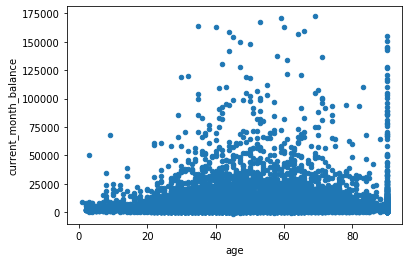

In [93]:
train_x.plot.scatter('age','current_month_balance')

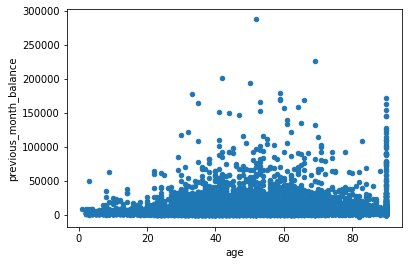

In [94]:
train_x.plot.scatter('age','previous_month_balance')

## Removing Outlier from previous_month_balance

In [95]:
train_x[train_x['previous_month_balance']>=175000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
6782,7223,2447,50,0,2,0,491,2,707,129.0,123891.59,188178.94,206276.20,209889.93,0.27,0.27,0.27,0.27,147537.58,193709.23
25200,26900,712,33,1,0,1,1232,1,52,70.0,604.76,177808.97,67053.56,375.78,0.13,0.13,177204.34,0.13,18936.23,177808.97
26638,28444,6120,42,0,0,1,1020,1,1,80.0,239854.84,122937.61,179700.19,54320.87,0.01,0.01,632.61,600.01,130733.89,200767.88
19890,21224,1158,59,0,0,0,1621,1,50,23.0,25463.25,180914.98,120234.44,28147.80,1809.39,1694.79,157143.20,0.34,36147.08,179878.43
4058,4325,416,52,1,0,0,956,3,1571,52.0,43016.90,280903.78,215307.04,194131.30,0.57,8.89,237787.82,18595.82,65268.75,287630.23
4876,5188,4563,69,0,2,1,1540,1,670,70.0,175919.31,196569.40,208722.36,245579.42,0.26,0.26,12195.97,75714.54,172385.97,226030.56


In [96]:
train_x=train_x[train_x['previous_month_balance']<=175000]

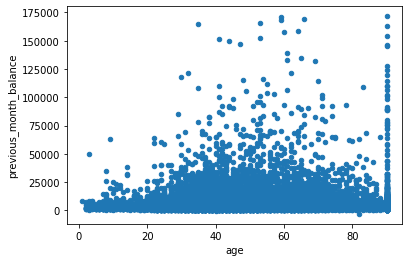

In [97]:
train_x.plot.scatter('age','previous_month_balance')

# Building Machine Learning Models

## Decision Tree

In [98]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [99]:
clf = DecisionTreeClassifier()

In [100]:
clf.fit(train1_x,train1_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
clf.score(train1_x,train1_y)

1.0

In [102]:
clf.score(test_x,test_y)

0.7879161528976573

## Random Forest

In [103]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [104]:
clf = RandomForestClassifier()

In [105]:
clf.fit(train1_x,train1_y)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
clf.score(train1_x,train1_y)

0.9848491521691257

In [107]:
clf.score(test_x,test_y)

0.8523868240267747

## Linear Regression and Metric mean square error

In [108]:
#Importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as MAE

In [109]:
#Creating instance of Linear Regression
lr = LR()

#Fitting the model
lr.fit(train1_x,train1_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
#Predicting over the train set and calculating the error
train_predict = lr.predict(train1_x)
k = MAE(train_predict,train1_y)
print("Training Mean Absolute Error : ",k)

Training Mean Absolute Error :  0.293466727050904


In [111]:
#Predicting over the test set and calculating the error
test_predict = lr.predict(test_x)
k = MAE(test_predict,test_y)
print("Test Mean Absolute Error : ",k)

Test Mean Absolute Error :  0.2937260425385727


## KNN Classifier

In [112]:
#Importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [113]:
#Creating instance of KNN
clf = KNN(n_neighbors = 2)

#Fitting the model
clf.fit(train1_x,train1_y)

#Predicting over the train set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict,test_y)
print("Test F1 score : ",k)

Test F1 score :  0.30725053840631733


In [114]:
def Elbow(K):
        test_error = []
        
        for i in K:
            clf = KNN(n_neighbors = i)
            clf.fit(train1_x,train1_y)
            tmp = clf.predict(test_x)
            tmp = f1_score(tmp,test_y)
            error = 1-tmp
            test_error.append(error)
            
        return test_error

In [115]:
k = range(1,10,2)

In [116]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

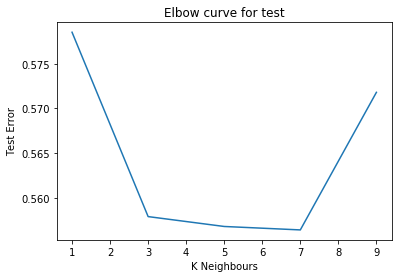

In [117]:
plt.plot(k,test)
plt.xlabel('K Neighbours')
plt.ylabel('Test Error')
plt.title('Elbow curve for test')

In [118]:
#Creating instance of KNN
clf = KNN(n_neighbors = 7)

#Fitting the model
clf.fit(train1_x,train1_y)

#Predicting over the train set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict,test_y)
print("Test F1 score : ",k)

Test F1 score :  0.443609022556391


## Logistic Regression and Metric f1_score

In [119]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [120]:
#Creating instance of Logistic Regression
logreg = LogReg()

#Fitting the model
logreg.fit(train1_x,train1_y)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
train_predict = logreg.predict(train1_x)
train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
#Calculating f1-score
k = f1_score(train_predict,train1_y)
print("Training f1_score : ",k)

Training f1_score :  0.15807413719642094


In [123]:
#Predicting over the Test set and f1_score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict,test_y)
print("Test f1_score : ",k)

Test f1_score :  0.16666666666666669


## Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_y,test_predict)
print(cf)

[[4599   26]
 [ 954   98]]


## Precision, Recall and f1_score

In [126]:
from sklearn.metrics import classification_report as rep
print(rep(test_y,test_predict))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4625
           1       0.79      0.09      0.17      1052

    accuracy                           0.83      5677
   macro avg       0.81      0.54      0.54      5677
weighted avg       0.82      0.83      0.77      5677



### Done by Pinaki Bhattacharjee